In [1]:
!pip install -e ..

Obtaining file:///Users/tobiasolbruck/University/PDS/PDS_Project
  Attempting uninstall: PDS-Project
    Found existing installation: PDS-Project 0.0.1.dev12
    Uninstalling PDS-Project-0.0.1.dev12:
      Successfully uninstalled PDS-Project-0.0.1.dev12
  Running setup.py develop for PDS-Project


In [2]:
import nextbike

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import numpy as np
import scipy.stats as stats
import math

In [4]:
start = time.time()
df = nextbike.io.read_file()
df = nextbike.io.preprocessData(df)
df_trips = nextbike.io.createTrips(df)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

Error at lines:
128324
128580
128674
128824
128860
129114
129340
129513
130326
648905
649161
649255
649405
649441
649695
649921
650094
650907
1169486
1169742
1169836
1169986
1170022
1170276
1170502
1170675
1171488
275.480s

In [5]:
start = time.time()
df_trips_cleaned = nextbike.io.drop_outliers(df_trips)
ende = time.time()
print('{:5.3f}s'.format(ende-start), end='  ')

80.828s

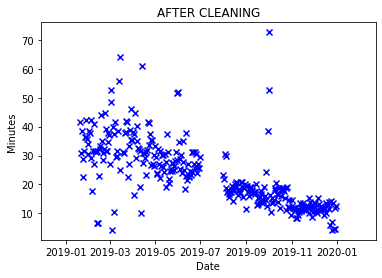

In [6]:
# group booking data by date and calculate mean trip length per date
plot_data_date = df_trips_cleaned.groupby(df_trips_cleaned.sTime.dt.date).durationInSec.mean(numeric_only=False)

# plot figure
plt.scatter(plot_data_date.index, plot_data_date / 60, color='blue', marker='x')
plt.title('AFTER CLEANING')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.show()

In [7]:
# show days with long trips
help = pd.DataFrame(plot_data_date)
longTrips = help.loc[(help['durationInSec'] > 2400)]
longTrips.reset_index(inplace=True)
longTrips['weekday'] = pd.DatetimeIndex(longTrips["sTime"]).dayofweek
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 50)
longTrips

sTime  durationInSec  weekday
0   2019-01-20    2497.592593        6
1   2019-01-27    2530.941176        6
2   2019-02-03    2536.396396        6
3   2019-02-08    2456.863636        4
4   2019-02-17    2645.278592        6
5   2019-02-22    2673.019272        4
6   2019-03-02    2905.858586        5
7   2019-03-03    3152.619048        6
8   2019-03-08    2496.494845        4
9   2019-03-13    3342.857143        2
10  2019-03-14    3842.891566        3
11  2019-03-22    2511.383812        4
12  2019-03-24    2497.446809        6
13  2019-03-30    2773.456464        5
14  2019-04-04    2674.608150        3
15  2019-04-06    2411.162791        5
16  2019-04-13    3655.855263        5
17  2019-04-21    2493.544669        6
18  2019-04-22    2480.487805        0
19  2019-05-30    3097.210300        3
20  2019-06-01    3119.547511        5
21  2019-10-01    4357.500000        1
22  2019-10-02    3167.633588        2

In [8]:
df_trips_cleaned.head()

bNumber               sTime               eTime duration     sLong  \
0    11169 2019-01-20 01:55:00 2019-01-20 02:06:00 00:11:00  8.763266   
1    11169 2019-01-20 08:15:00 2019-01-20 11:39:00 03:24:00  8.770358   
2    11169 2019-01-20 11:58:00 2019-01-20 12:06:00 00:08:00  8.770358   
3    11169 2019-01-20 15:12:00 2019-01-20 15:27:00 00:15:00  8.759248   
4    11169 2019-01-20 15:39:00 2019-01-20 15:42:00 00:03:00  8.774681   

        sLat     eLong       eLat  weekend  bType  sPlaceNumber  ePlaceNumber  \
0  50.795224  8.770358  50.804522     True     15          5173          5159   
1  50.804522  8.770358  50.804522     True     15          5159          5159   
2  50.804522  8.759248  50.804725     True     15          5159          5178   
3  50.804725  8.774681  50.822927     True     15          5178          5150   
4  50.822927  8.774681  50.822927     True     15          5150          5150   

   durationInSec  
0            660  
1          12240  
2            480  
3            900  
4            180

In [9]:
df_trips_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607599 entries, 0 to 630917
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   bNumber        607599 non-null  int64          
 1   sTime          607599 non-null  datetime64[ns] 
 2   eTime          607599 non-null  datetime64[ns] 
 3   duration       607599 non-null  timedelta64[ns]
 4   sLong          607599 non-null  float64        
 5   sLat           607599 non-null  float64        
 6   eLong          607599 non-null  float64        
 7   eLat           607599 non-null  float64        
 8   weekend        607599 non-null  bool           
 9   bType          607599 non-null  int64          
 10  sPlaceNumber   607599 non-null  int64          
 11  ePlaceNumber   607599 non-null  int64          
 12  durationInSec  607599 non-null  int64          
dtypes: bool(1), datetime64[ns](2), float64(4), int64(5), timedelta64[ns](1)
memory usage: 60.

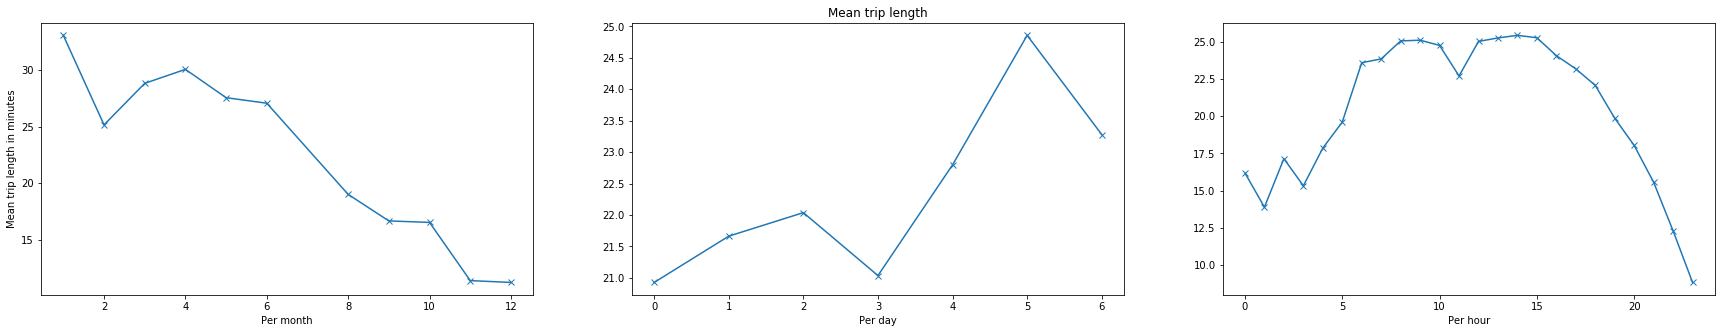

In [10]:
(nextbike.visualization.visualizeMeanTripLength(df_trips_cleaned)).show()

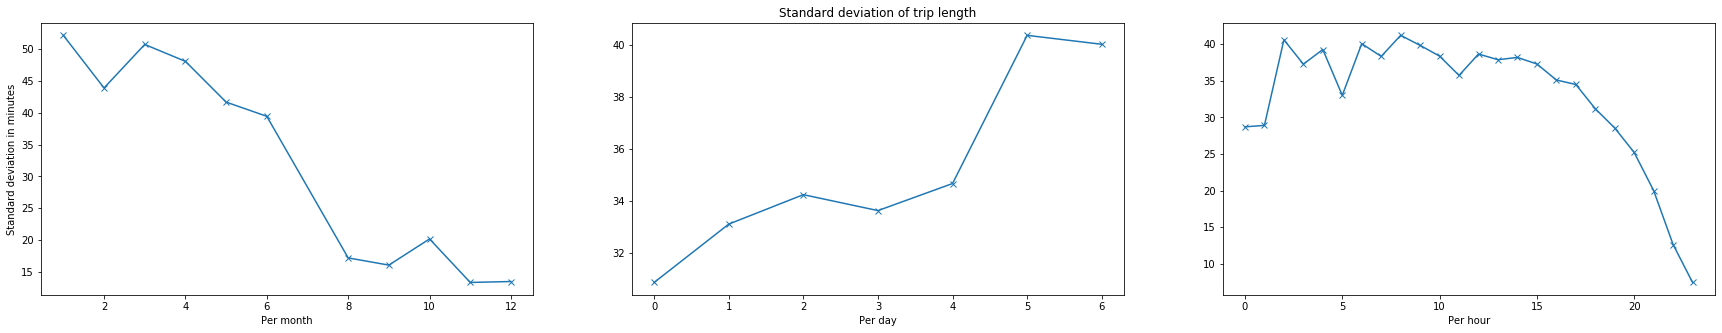

In [11]:
(nextbike.visualization.visualizeStdTripLength(df_trips_cleaned)).show()

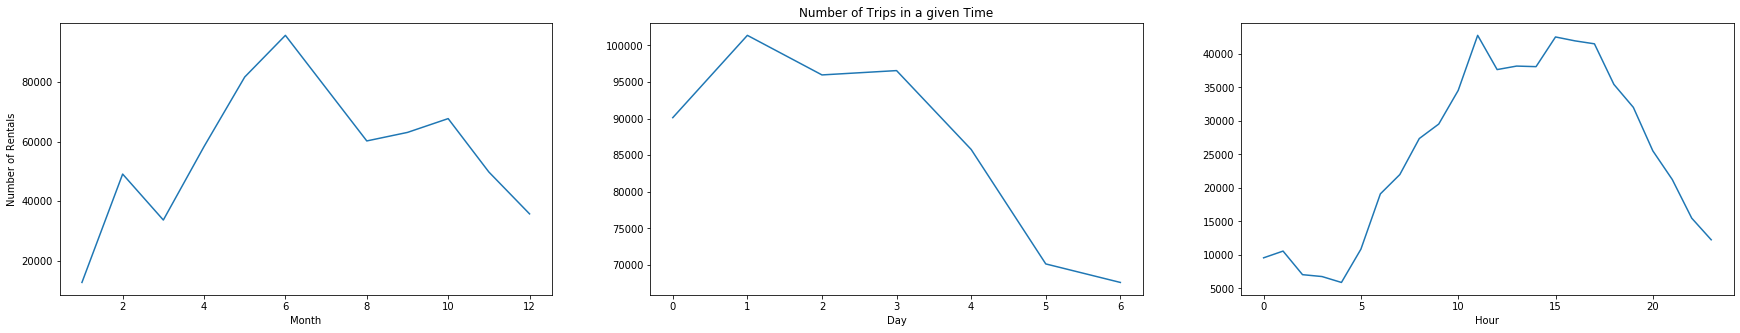

In [12]:
(nextbike.visualization.visualizeNumberOfTrips(df_trips_cleaned)).show()

In [13]:
visualizeTripLengthBoxplots(df_trips_cleaned)

NameError: name 'visualizeTripLengthBoxplots' is not defined

In [ ]:
(nextbike.visualization.visualizeDistributionOfTripsPerMonth(df_trips_cleaned)).show()

In [35]:
def visualizeDistributionOfTripsPerMonth(df):
    jan = (df.loc[(df['sTime'].dt.month==1)])["durationInSec"]
    feb = (df.loc[(df['sTime'].dt.month==2)])["durationInSec"]
    mar = (df.loc[(df['sTime'].dt.month==3)])["durationInSec"]
    apr = (df.loc[(df['sTime'].dt.month==4)])["durationInSec"]
    may = (df.loc[(df['sTime'].dt.month==5)])["durationInSec"]
    jun = (df.loc[(df['sTime'].dt.month==6)])["durationInSec"]
    jul = (df.loc[(df['sTime'].dt.month==7)])["durationInSec"]
    aug = (df.loc[(df['sTime'].dt.month==8)])["durationInSec"]
    sep = (df.loc[(df['sTime'].dt.month==9)])["durationInSec"]
    oct = (df.loc[(df['sTime'].dt.month==10)])["durationInSec"]
    nov = (df.loc[(df['sTime'].dt.month==11)])["durationInSec"]
    dec = (df.loc[(df['sTime'].dt.month==12)])["durationInSec"]

     # calculate mean and standard deviation for each month
    meanTripLengthPerMonth = (df.groupby(df.sTime.dt.month).durationInSec.mean(numeric_only=False)).to_dict()
    stdTripLengthPerMonth = (df.groupby(df.sTime.dt.month).durationInSec.std()).to_dict()

    # set size
    plt.rcParams["figure.figsize"][0] = 30
    plt.rcParams["figure.figsize"][1] = 30

    # Plot for january
    plt.subplot(4, 3, 1)
    x_jan = np.linspace(meanTripLengthPerMonth.get(1) - 3*stdTripLengthPerMonth.get(1), meanTripLengthPerMonth.get(1) + 3*stdTripLengthPerMonth.get(1), 100)
    plt.hist(jan, normed = True ,bins=100)
    plt.plot(x_jan, stats.norm.pdf(x_jan, meanTripLengthPerMonth.get(1), stdTripLengthPerMonth.get(1)))
    plt.title("January")

    # Plot for february
    plt.subplot(4, 3, 2)
    x_feb = np.linspace(meanTripLengthPerMonth.get(2) - 3*stdTripLengthPerMonth.get(2), meanTripLengthPerMonth.get(2) + 3*stdTripLengthPerMonth.get(2), 100)
    plt.hist(feb, normed = True ,bins=100)
    plt.plot(x_feb, stats.norm.pdf(x_feb, meanTripLengthPerMonth.get(2), stdTripLengthPerMonth.get(2)))
    plt.title("February")

    # Plot for march
    plt.subplot(4, 3, 3)
    x_mar = np.linspace(meanTripLengthPerMonth.get(3) - 3*stdTripLengthPerMonth.get(3), meanTripLengthPerMonth.get(3) + 3*stdTripLengthPerMonth.get(3), 100)
    plt.hist(mar, normed = True ,bins=100)
    plt.plot(x_mar, stats.norm.pdf(x_mar, meanTripLengthPerMonth.get(3), stdTripLengthPerMonth.get(3)))
    plt.title("March")

    # Plot for april
    plt.subplot(4, 3, 4)
    x_apr = np.linspace(meanTripLengthPerMonth.get(4) - 3*stdTripLengthPerMonth.get(4), meanTripLengthPerMonth.get(4) + 3*stdTripLengthPerMonth.get(4), 100)
    plt.hist(apr, normed = True ,bins=100)
    plt.plot(x_apr, stats.norm.pdf(x_apr, meanTripLengthPerMonth.get(4), stdTripLengthPerMonth.get(4)))
    plt.title("April")

    # Plot for may
    plt.subplot(4, 3, 5)
    x_may = np.linspace(meanTripLengthPerMonth.get(5) - 3*stdTripLengthPerMonth.get(5), meanTripLengthPerMonth.get(5) + 3*stdTripLengthPerMonth.get(5), 100)
    plt.hist(may, normed = True ,bins=100)
    plt.plot(x_may, stats.norm.pdf(x_may, meanTripLengthPerMonth.get(5), stdTripLengthPerMonth.get(5)))
    plt.title("May")

    # Plot for jun
    plt.subplot(4, 3, 6)
    x_jun = np.linspace(meanTripLengthPerMonth.get(6) - 3*stdTripLengthPerMonth.get(6), meanTripLengthPerMonth.get(6) + 3*stdTripLengthPerMonth.get(6), 100)
    plt.hist(jun, normed = True ,bins=100)
    plt.plot(x_jun, stats.norm.pdf(x_jun, meanTripLengthPerMonth.get(6), stdTripLengthPerMonth.get(6)))
    plt.title("June")

    # No data for july
    # Plot for july
    #plt.subplot(4, 3, 7)
    #x_jul = np.linspace(meanTripLengthPerMonth.get(7) - 3*stdTripLengthPerMonth.get(7), meanTripLengthPerMonth.get(7) + 3*stdTripLengthPerMonth.get(7), 100)
    #plt.hist(jul, normed = True ,bins=100)
    #plt.plot(x_jul, stats.norm.pdf(x_jul, meanTripLengthPerMonth.get(7), stdTripLengthPerMonth.get(7)))
    #plt.title("July")

    # Plot for august
    plt.subplot(4, 3, 8)
    x_aug = np.linspace(meanTripLengthPerMonth.get(8) - 3*stdTripLengthPerMonth.get(8), meanTripLengthPerMonth.get(8) + 3*stdTripLengthPerMonth.get(8), 100)
    plt.hist(aug, normed = True ,bins=100)
    plt.plot(x_aug, stats.norm.pdf(x_aug, meanTripLengthPerMonth.get(8), stdTripLengthPerMonth.get(8)))
    plt.title("August")

    # Plot for september
    plt.subplot(4, 3, 9)
    x_sep = np.linspace(meanTripLengthPerMonth.get(9) - 3*stdTripLengthPerMonth.get(9), meanTripLengthPerMonth.get(9) + 3*stdTripLengthPerMonth.get(9), 100)
    plt.hist(sep, normed = True ,bins=100)
    plt.plot(x_sep, stats.norm.pdf(x_sep, meanTripLengthPerMonth.get(9), stdTripLengthPerMonth.get(9)))
    plt.title("September")

    # Plot for october
    plt.subplot(4, 3, 10)
    x_oct = np.linspace(meanTripLengthPerMonth.get(10) - 3*stdTripLengthPerMonth.get(10), meanTripLengthPerMonth.get(10) + 3*stdTripLengthPerMonth.get(10), 100)
    plt.hist(oct, normed = True ,bins=100)
    plt.plot(x_oct, stats.norm.pdf(x_oct, meanTripLengthPerMonth.get(10), stdTripLengthPerMonth.get(10)))
    plt.title("October")

    # Plot for november
    plt.subplot(4, 3, 11)
    x_nov = np.linspace(meanTripLengthPerMonth.get(11) - 3*stdTripLengthPerMonth.get(11), meanTripLengthPerMonth.get(11) + 3*stdTripLengthPerMonth.get(11), 100)
    plt.hist(nov, normed = True ,bins=100)
    plt.plot(x_nov, stats.norm.pdf(x_nov, meanTripLengthPerMonth.get(11), stdTripLengthPerMonth.get(11)))
    plt.title("November")

    # Plot for december
    plt.subplot(4, 3, 12)
    x_dec = np.linspace(meanTripLengthPerMonth.get(12) - 3*stdTripLengthPerMonth.get(12), meanTripLengthPerMonth.get(12) + 3*stdTripLengthPerMonth.get(12), 100)
    plt.hist(dec, normed = True ,bins=100)
    plt.plot(x_dec, stats.norm.pdf(x_dec, meanTripLengthPerMonth.get(12), stdTripLengthPerMonth.get(12)))
    plt.title("December")

    return plt

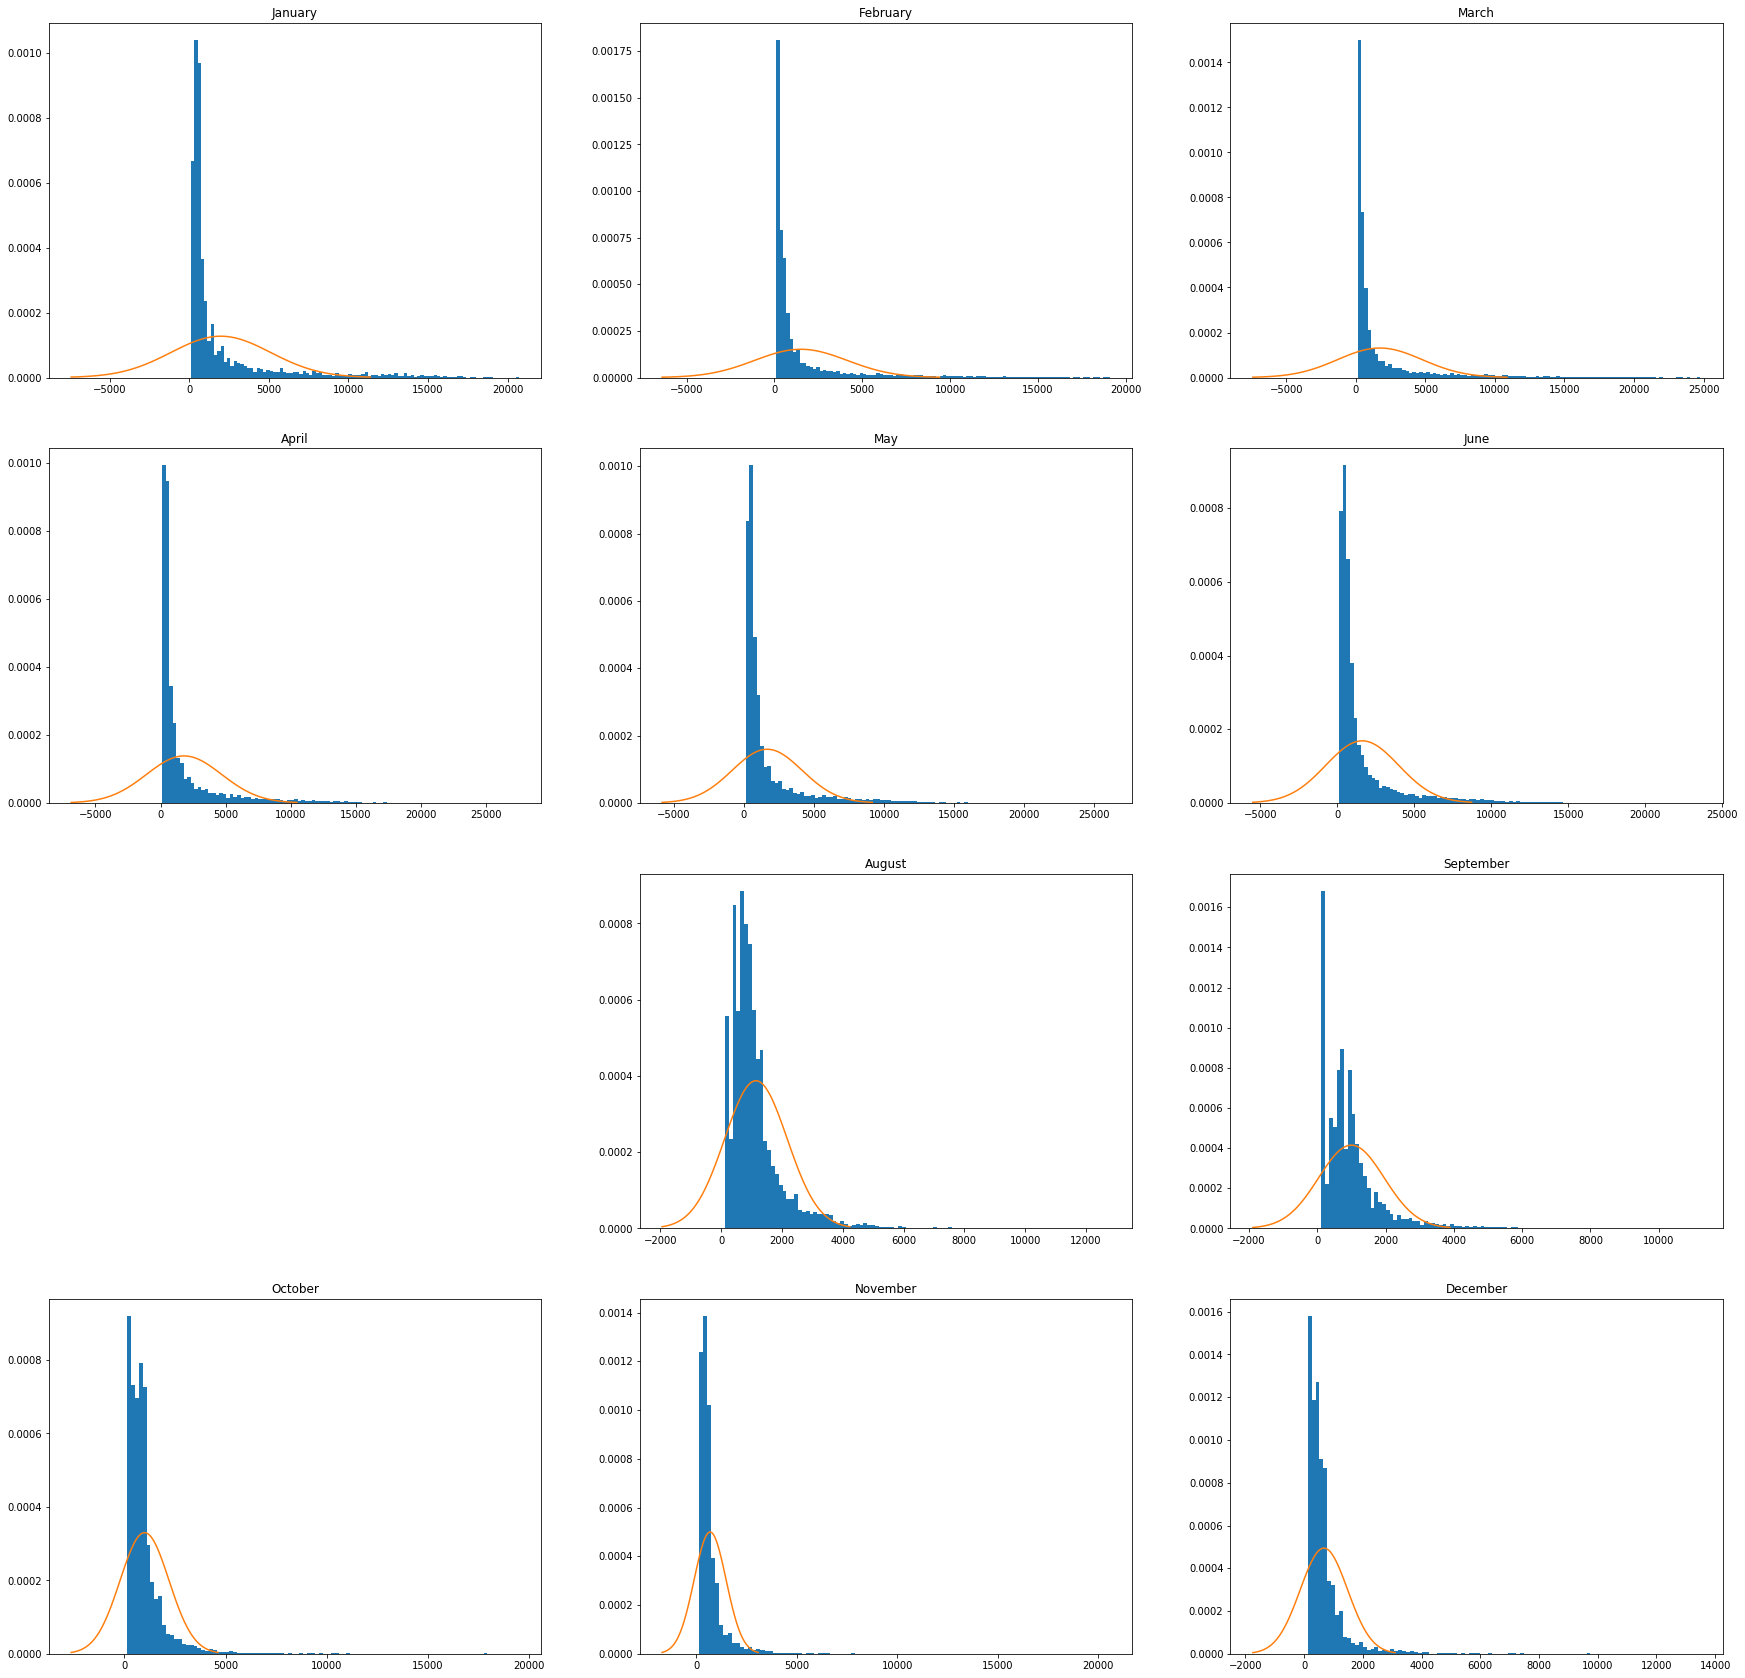

In [36]:
visualizeDistributionOfTripsPerMonth(df_trips_cleaned).show()

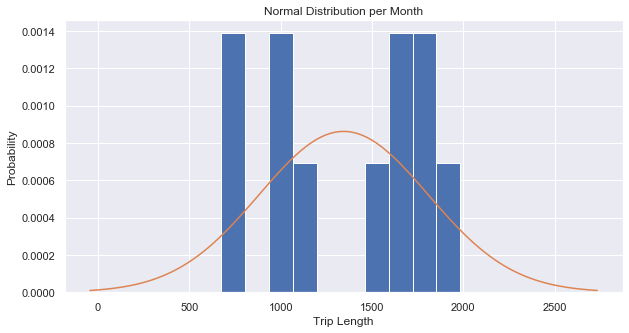

In [107]:
meanTripLengthPerMonth = df_trips_cleaned.groupby(df_trips_cleaned.sTime.dt.month).durationInSec.mean()
mean = meanTripLengthPerMonth.mean()
var = meanTripLengthPerMonth.var()
std = meanTripLengthPerMonth.std()

x = np.linspace(mean - 3*std, mean + 3*std, 100)

plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 5
plt.hist(meanTripLengthPerMonth, normed = True)
plt.plot(x, stats.norm.pdf(x, mean, std))

plt.xlabel("Trip Length")
plt.ylabel('Probability')
plt.title('Normal Distribution per Month')

plt.show()

In [89]:
meanTripLengthPerMonth

sTime
1     1984.064698
2     1509.347507
3     1729.469562
4     1803.648899
5     1653.515659
6     1624.137996
8     1140.550157
9      999.883915
10     991.989362
11     683.329116
12     673.527932
Name: durationInSec, dtype: float64

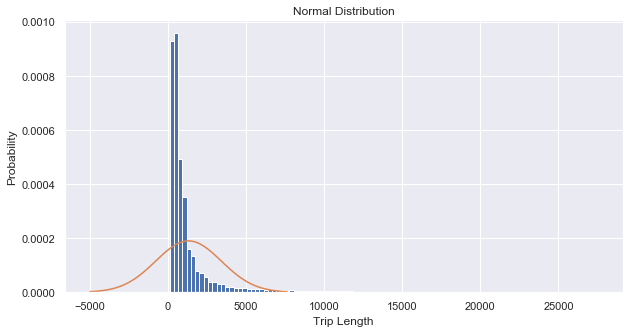

In [70]:
tripLength = df_trips_cleaned['durationInSec']
mean = tripLength.mean()
var = tripLength.var()
std = tripLength.std()

x = np.linspace(mean - 3*std, mean + 3*std, 100)

plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 5
plt.hist(tripLength, normed = True ,bins=100)
plt.plot(x, stats.norm.pdf(x, mean, std))

plt.xlabel("Trip Length")
plt.ylabel('Probability')
plt.title('Normal Distribution')

plt.show()

Text(0, 0.5, 'Mean trip length in minutes')

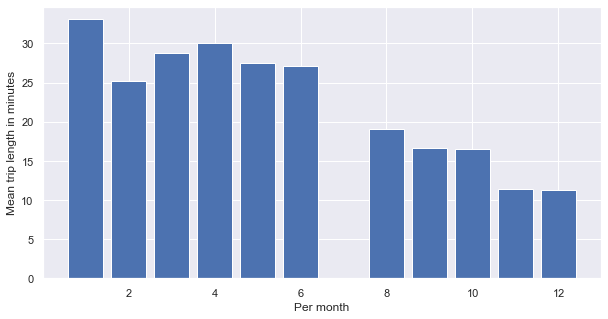

In [88]:
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 5
plt.bar(meanTripLengthPerMonth.index, meanTripLengthPerMonth/60)
plt.xlabel("Per month")
plt.ylabel('Mean trip length in minutes')

In [79]:
df_trips_cleaned['month'] = pd.DatetimeIndex(df_trips_cleaned["sTime"]).month
df_trips_cleaned['day'] = pd.DatetimeIndex(df_trips_cleaned["sTime"]).day
df_trips_cleaned['hour'] = pd.DatetimeIndex(df_trips_cleaned["sTime"]).hour

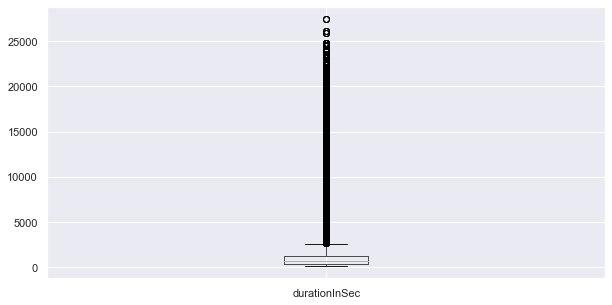

In [81]:
# Box plot for trip duration in general
df_trips_cleaned.boxplot("durationInSec", showfliers=True)

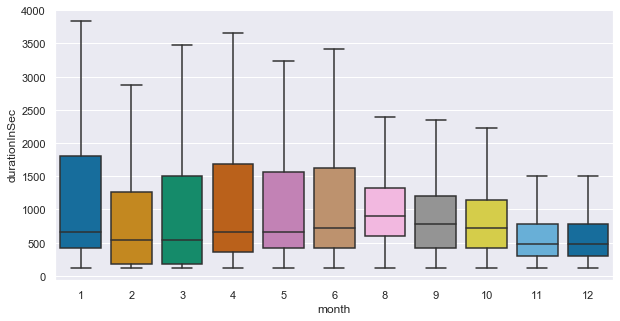

In [85]:
# Boxplots per Month
sns.boxplot(y='durationInSec', x='month', data=df_trips_cleaned, palette="colorblind", showfliers=False)

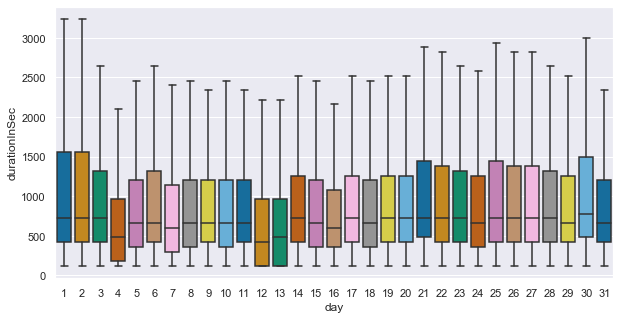

In [86]:
# Boxplots per Day
sns.boxplot(y='durationInSec', x='day', data=df_trips_cleaned, palette="colorblind", showfliers=False)

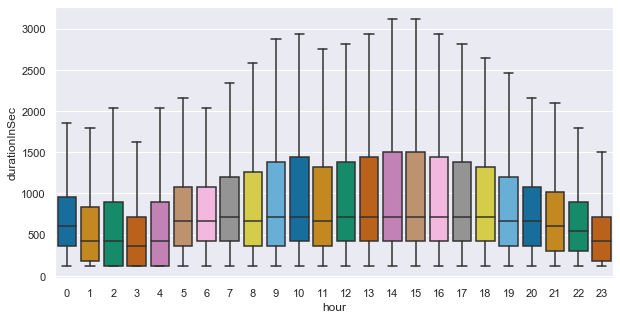

In [87]:
# Boxplots per Hour
sns.boxplot(y='durationInSec', x='hour', data=df_trips_cleaned, palette="colorblind", showfliers=False)

In [104]:
def visualizeTripLengthBoxplots(df):
    fig, axes = plt.subplots(3, 1, figsize=(20, 15))
    fig.suptitle('Trip Length in Boxplots')
    df['month'] = pd.DatetimeIndex(df["sTime"]).month
    df['day'] = pd.DatetimeIndex(df["sTime"]).day
    df['hour'] = pd.DatetimeIndex(df["sTime"]).hour

    # Boxplots per Month
    sns.boxplot(y='durationInSec', x='month', data=df, palette="colorblind", showfliers=False, ax=axes[0])
    # Boxplots per Day
    sns.boxplot(y='durationInSec', x='day', data=df, palette="colorblind", showfliers=False, ax=axes[1])
    # Boxplots per Day
    sns.boxplot(y='durationInSec', x='hour', data=df, palette="colorblind", showfliers=False, ax=axes[2])

    return sns

<module 'seaborn' from '/Users/tobiasolbruck/opt/miniconda3/envs/PDS20/lib/python3.7/site-packages/seaborn/__init__.py'>

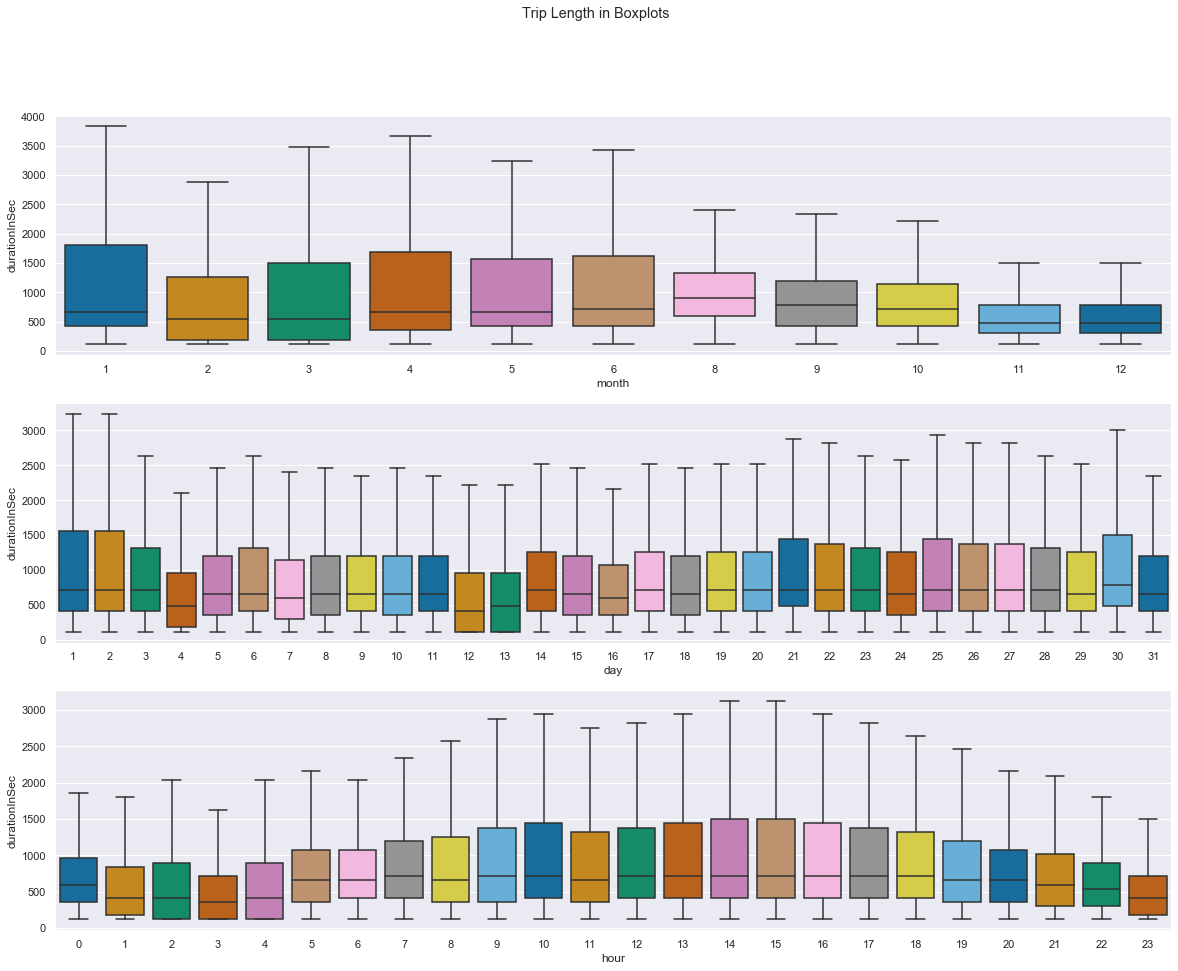

In [105]:
visualizeTripLengthBoxplots(df_trips_cleaned)

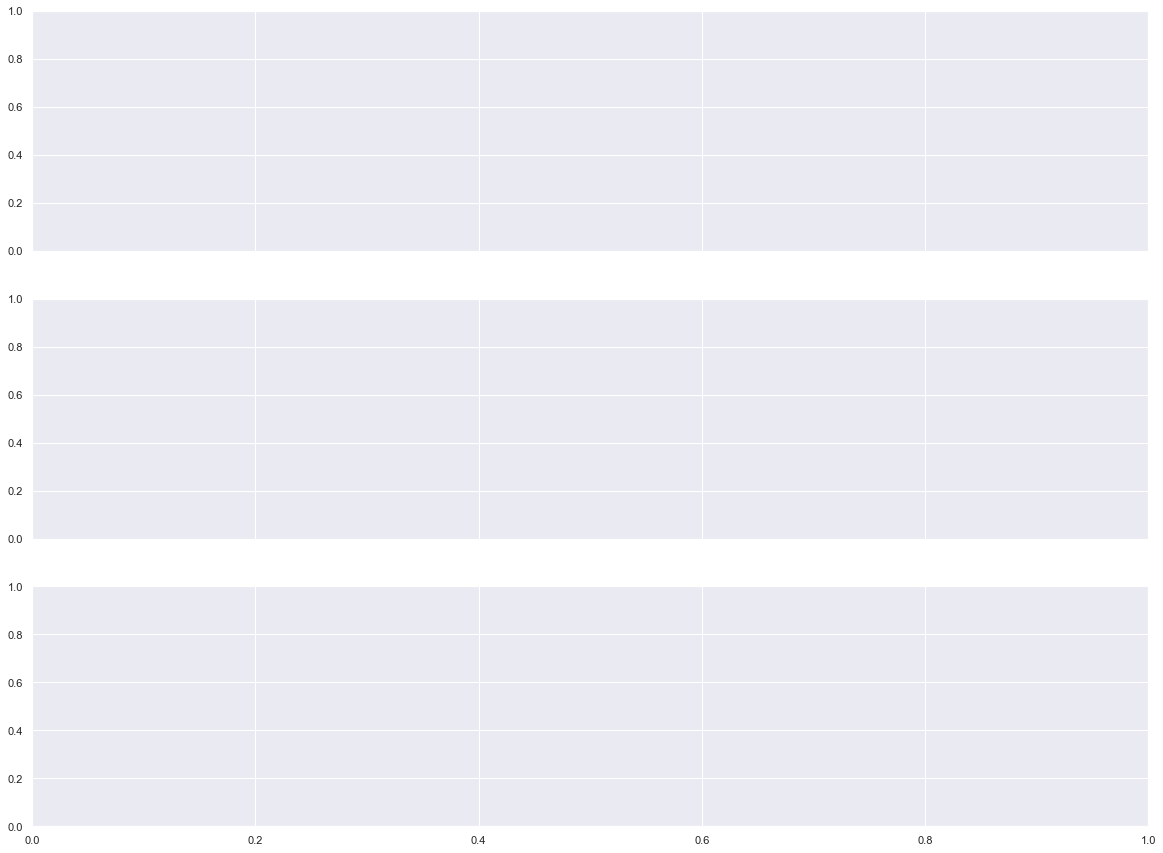

In [100]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15), sharex=True)
axes[0]